<a href="https://colab.research.google.com/github/NancyAmer0/DeepLearningPractice/blob/main/Building_batch_stochastic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Batch Gradient Function

In [90]:
def batch(X, y, epochs, learning_rate=0.001):
  """using batch gradient descent to train a model without a premade library
  """
  features_number = X.shape[1]
  #initializing w and b
  w = np.ones(shape=(features_number))
  b = 0
  samples = X.shape[0]

  cost_list = []
  epochs_list = []

  #looping to calculate the cost and update the weights after every epoch
  for i in range(epochs):
    y_predict = np.dot(w, X.T) + b

    w_grad = -(2/samples)*(X.T.dot(y-y_predict))
    b_grad = -(2/samples)*(np.sum(y-y_predict))
    w = w - learning_rate*w_grad
    b = b - learning_rate*b_grad

    cost = np.mean(np.square(y - y_predict))

    #saving the cost over every 10 epochs
    if i%10 == 0:
      cost_list.append(cost)
      epochs_list.append(i)

  return w, b, cost, cost_list, epochs_list

#try

In [91]:
df = pd.read_csv('/content/insurance_data.csv')

In [92]:
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [93]:
df.shape

(28, 3)

In [94]:
df.isnull().sum()

,0
age,0
affordibility,0
bought_insurance,0


In [95]:
df.duplicated().sum()

np.int64(1)

In [96]:
df.describe()

,age,affordibility,bought_insurance
count,28.000000,28.000000,28.000000
mean,39.892857,0.678571,0.500000
std,15.497525,0.475595,0.509175
min,18.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000
50%,45.500000,1.000000,0.500000
75%,54.250000,1.000000,1.000000
max,62.000000,1.000000,1.000000


In [97]:
X = df.drop('bought_insurance', axis=1)
y = df['bought_insurance']

In [98]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_sc = scaler.fit_transform(X)

In [99]:
w, b, cost, cost_list, epochs_list = batch(X_sc, y, 1000)

In [100]:
w, b, cost

(array([0.82881489, 0.59041663]),
 np.float64(-0.32104471906809273),
 np.float64(0.1343050054553808))

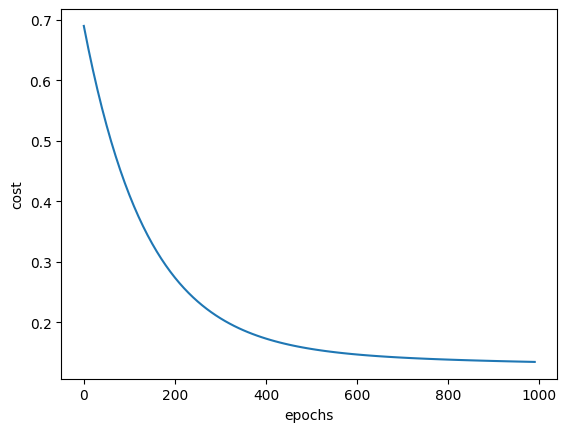

In [101]:
plt.plot(epochs_list, cost_list)
plt.xlabel('epochs')
plt.ylabel('cost')
plt.show()

#prediction function

In [102]:
#the output prediction function
def predict(age, affordibility, w, b):
  age_sc = age/62
  insurance = w[0] * age_sc + w[1] * affordibility + b
  return insurance

In [103]:
np.round(predict(52,0, w, b))

np.float64(0.0)

In [104]:
np.round(predict(46,1, w, b))

np.float64(1.0)

#Stochastic Gradient Descent

In [116]:
def stochastic(X, y, epochs, learning_rate=0.001):
  """using batch gradient descent to train a model without a premade library
  """
  features_number = X.shape[1]
  #initializing w and b
  w = np.ones(shape=(features_number))
  b = 0
  samples = X.shape[0]

  cost_list = []
  epochs_list = []

  #looping to calculate the cost and update the weights after every epoch
  for i in range(epochs):
    #choosing a single random sample for each epoch
    instance = np.random.randint(0, samples-1)
    instance_X = X[instance]
    instance_y = y[instance]
    y_predict = np.dot(w, instance_X.T) + b

    w_grad = -2 * instance_X.T.dot(instance_y - y_predict)
    b_grad = -2 * np.sum(instance_y - y_predict)

    w = w - learning_rate*w_grad
    b = b - learning_rate*b_grad

    cost = np.mean(np.square(instance_y - y_predict))

    #saving the cost over every 10 epochs
    if i%10 == 0:
      cost_list.append(cost)
      epochs_list.append(i)

  return w, b, cost, cost_list, epochs_list

In [121]:
w, b, cost, cost_list, epochs_list = stochastic(X_sc, y, 500)
w, b, cost

(array([0.83878495, 0.68857431]),
 np.float64(-0.2980372366379148),
 np.float64(0.02369723049550682))

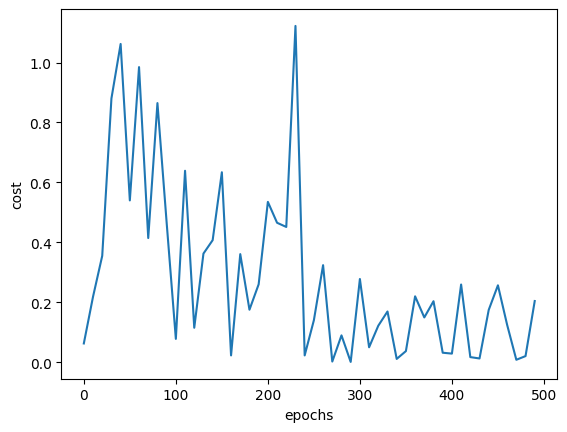

In [122]:
plt.plot(epochs_list, cost_list)
plt.xlabel('epochs')
plt.ylabel('cost')
plt.show()

In [123]:
np.round(predict(52,0, w, b))

np.float64(0.0)

In [124]:
np.round(predict(46,1, w, b))

np.float64(1.0)

#Mini Batch

In [125]:
def minibatch(X, y, epochs, batch_size, learning_rate=0.001):
  """using batch gradient descent to train a model without a premade library
  """
  features_number = X.shape[1]
  #initializing w and b
  w = np.ones(shape=(features_number))
  b = 0
  samples = X.shape[0]

  cost_list = []
  epochs_list = []

  #looping to calculate the cost and update the weights after every epoch
  for i in range(epochs):
    #choosing random samples for each batch
    instances = [np.random.randint(0, samples-1) for j in range(batch_size)]
    instance_X = X[instances]
    instance_y = y[instances]
    y_predict = np.dot(w, instance_X.T) + b

    w_grad = -(2/batch_size) * instance_X.T.dot(instance_y - y_predict)
    b_grad = -(2/batch_size) * np.sum(instance_y - y_predict)

    w = w - learning_rate*w_grad
    b = b - learning_rate*b_grad

    cost = np.mean(np.square(instance_y - y_predict))

    #saving the cost over every 10 epochs
    if i%10 == 0:
      cost_list.append(cost)
      epochs_list.append(i)

  return w, b, cost, cost_list, epochs_list

In [126]:
w, b, cost, cost_list, epochs_list = stochastic(X_sc, y, 500)
w, b, cost

(array([0.86187546, 0.69517112]),
 np.float64(-0.29619520443354214),
 np.float64(0.3567764124153008))

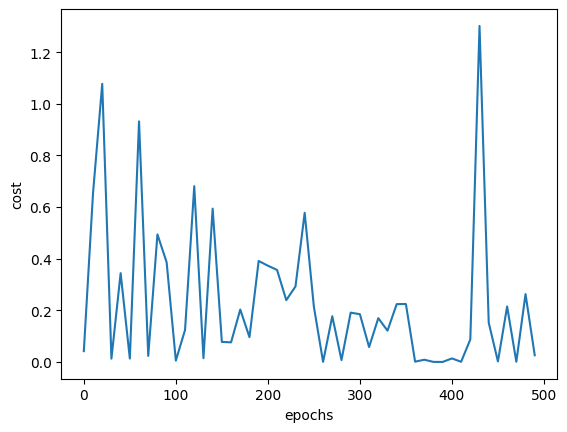

In [127]:
plt.plot(epochs_list, cost_list)
plt.xlabel('epochs')
plt.ylabel('cost')
plt.show()

In [128]:
np.round(predict(52,0, w, b))

np.float64(0.0)

In [129]:
np.round(predict(46,1, w, b))

np.float64(1.0)